# Dense networks

## 1. Recap линейный классификатор

In [52]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [54]:
# generate x
X = np.random.rand(100, 2)

2.18 µs ± 18.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
# f(x) = 3 * x1 + x2 - 2
y = 3 * X[:, 0] + X[:, 1] - 2 > 0

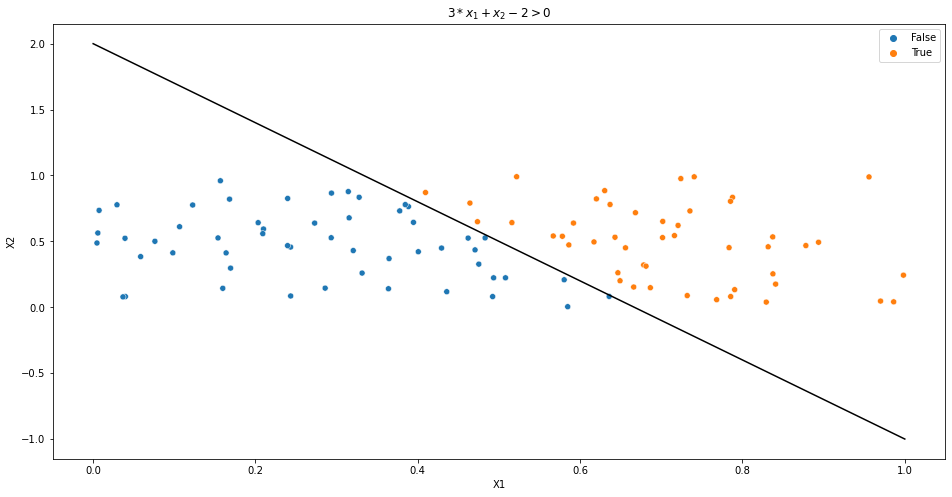

In [5]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(16)
fig.set_figheight(8)
ax.plot(
    np.linspace(0, 1, 11),
    -3 * np.linspace(0, 1, 11) + 2,
    c="black"
)
sns.scatterplot(
    x=X[:, 0], 
    y=X[:, 1], 
    hue=y, 
    ax=ax, 
    palette="tab10"
)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("$3 * x_1 + x_2 - 2 > 0$");

Изобразим схематично что у нас получилось

<img src="img/linear_cls.jpg"/>

## 2. Threshold

На выходе схемы стоит так называемая threshold функция

<img src="img/threshold.jpg"/>

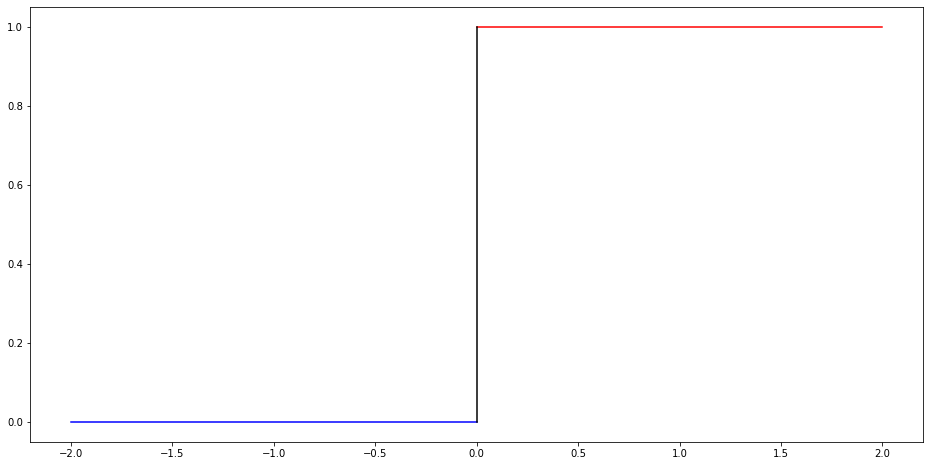

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(16)
fig.set_figheight(8)
ax.plot([-2.0, 0.0], [0, 0], c="blue");
ax.plot([0.0, 2.0], [1.0, 1.0], c="red");
ax.plot([0.0, 0.0], [0.0, 1.0], c="black");

## 3. Персептрон

Обобщим модель на вход произвольной размерности

<img src="img/perceptron.jpg">

Полное объяснение индексов весов рассмотрим чуть позже

Пока что $\large{W^{?}_{from\space ?}}$

In [7]:
class Perceptron:
    
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def forward(self, x):
        return x.dot(self.weights) + self.bias > 0

In [8]:
perceptron = Perceptron(np.array([3, 1]), -2)

In [9]:
Xnew = np.random.rand(50, 2)
output = perceptron.forward(Xnew)

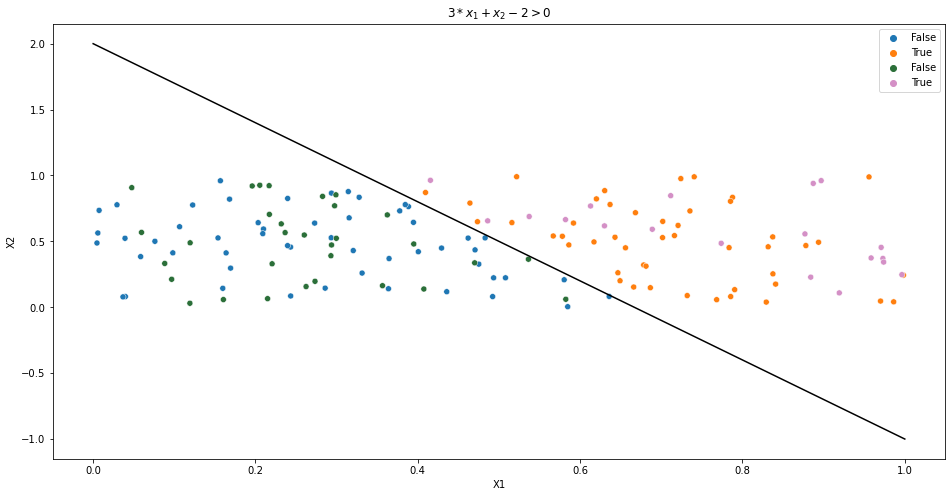

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(16)
fig.set_figheight(8)
ax.plot(
    np.linspace(0, 1, 11),
    -3 * np.linspace(0, 1, 11) + 2,
    c="black"
)
sns.scatterplot(
    x=X[:, 0], 
    y=X[:, 1], 
    hue=y, 
    ax=ax, 
    palette="tab10"
)
sns.scatterplot(
    x=Xnew[:, 0], 
    y=Xnew[:, 1], 
    hue=output, 
    ax=ax, 
    palette="cubehelix"
)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("$3 * x_1 + x_2 - 2 > 0$");

## 4. XOR проблема

Вспомним что есть класс задач с которым линейные классификаторы плохо справляются - а именно XOR задача

In [11]:
# generate x
X = np.random.rand(100, 2)

# f1(x) = 3 * x1 + x2 - 2
y1 = 3 * X[:, 0] + X[:, 1] - 2 > 0


# f2(x) = -3 * x1 + x2 + 1
y2 = -3 * X[:, 0] + X[:, 1] + 1 > 0

In [12]:
labels = np.logical_xor(y1, y2)

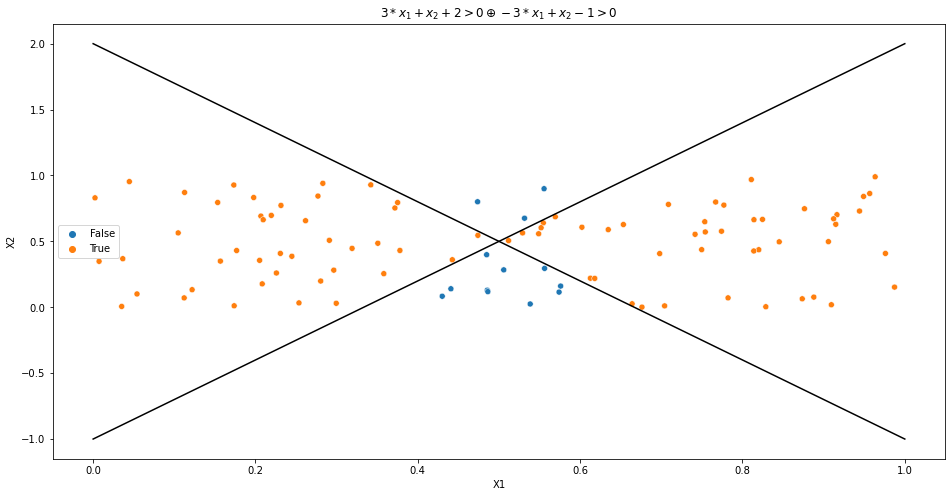

In [13]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(16)
fig.set_figheight(8)
ax.plot(
    np.linspace(0, 1, 11),
    -3 * np.linspace(0, 1, 11) + 2,
    c="black"
)
ax.plot(
    np.linspace(0, 1, 11),
    3 * np.linspace(0, 1, 11) - 1,
    c="black"
)
sns.scatterplot(
    x=X[:, 0], 
    y=X[:, 1], 
    hue=labels, 
    ax=ax, 
    palette="tab10"
)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title(r"$3 * x_1 + x_2 + 2 > 0  \oplus  -3 * x_1 + x_2 - 1 > 0$");

Разделить классы таким образом можно только с помощью двух прямых, давайте увеличим нашу схему

<img src="img/xor.jpg">

## 5. Многослойный персептрон

<img src="img/weights_index.jpg">

Итак мы имеем несколько перцептронов на одном слое и несколько слоев в графе, и можем раскрыть что за индексы применяются в весах

$\large{W^{layer}_{from \space to}}$

In [26]:
from abc import ABC, abstractmethod
from typing import List

In [23]:
class Layer(ABC):
    
    @abstractmethod
    def forward(self, x):
        raise NotImplementedError

In [28]:
# реализуем вычисление одного слоя

class PerceptronLayer(Layer):
    
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        
    def forward(self, x):
        return x.dot(self.weights) + self.biases > 0

Как мы видим сам класс не изменился, однако теперь weights у нас является матрицей а biases вектором

In [29]:
weights_1 = np.array([
    [3, -3],
    [1, 1]
])
biases_1 = np.array([-2, 1])

weights_2 = np.array([
    [1, -1],
    [1, -1]
])
biases_2 = np.array([-0.5, 1.5])

weights_3 = np.array([
    [1],
    [1]
])
biases_3 = np.array([-1.5])

In [30]:
layer1 = PerceptronLayer(weights_1, biases_1)
layer2 = PerceptronLayer(weights_2, biases_2)
layer3 = PerceptronLayer(weights_3, biases_3)

In [31]:
result = Xnew
for layer in [layer1, layer2, layer3]:
    result = layer.forward(result)

In [33]:
# паттерн композиция

class ComputationalGraph:
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [34]:
graph = ComputationalGraph([layer1, layer2, layer3])

In [35]:
output = graph.forward(Xnew).flatten()

In [37]:
weights_1.flatten()

array([ 3, -3,  1,  1])

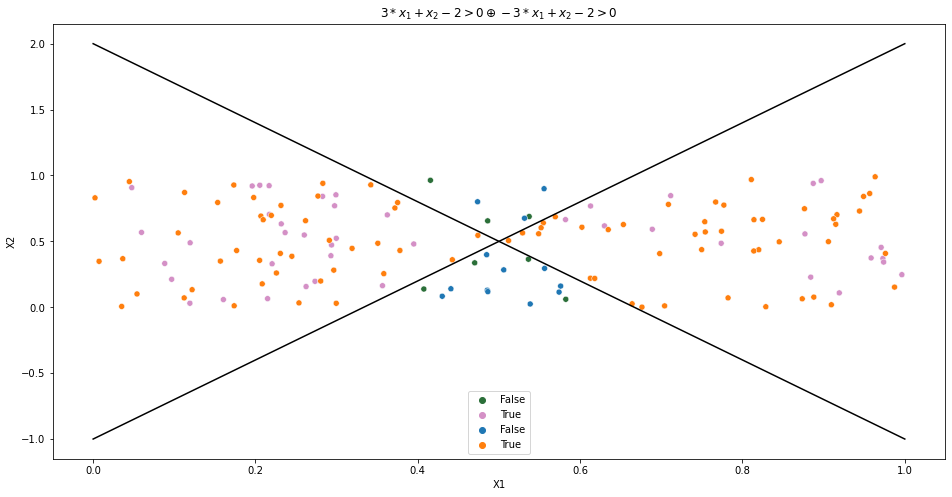

In [38]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(16)
fig.set_figheight(8)
ax.plot(
    np.linspace(0, 1, 11),
    -3 * np.linspace(0, 1, 11) + 2,
    c="black"
)
ax.plot(
    np.linspace(0, 1, 11),
    3 * np.linspace(0, 1, 11) - 1,
    c="black"
)
sns.scatterplot(
    x=Xnew[:, 0], 
    y=Xnew[:, 1], 
    hue=output, 
    ax=ax, 
    palette="cubehelix"
)
sns.scatterplot(
    x=X[:, 0], 
    y=X[:, 1], 
    hue=labels, 
    ax=ax, 
    palette="tab10"
)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title(r"$3 * x_1 + x_2 - 2 > 0  \oplus  -3 * x_1 + x_2 - 2 > 0$");

Очевидно что мы можем выделять любые замкнутые поверхности с помощью разделяющих плоскостей

Персептрон с несколькими слоями называется - многослойный персептрон

Многослойный персептрон это одна из архитектур нейронной сети

Нейронные сети изучает область которая называется Deep learning

Deep - означает что мы имеем больше одного скрытого слоя

<img src="img/multilayer_perceptron.png">

In [39]:
y = (X[:, 0] > 0.4) & (X[:, 0] < 0.6) & (X[:, 1] > 0.4) & (X[:, 1] < 0.6)

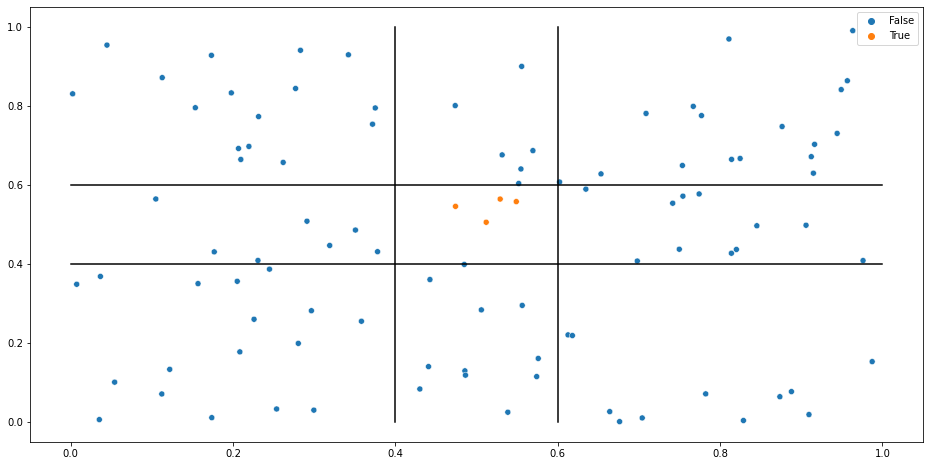

In [40]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(16)
fig.set_figheight(8)
ax.plot(
    [0.4, 0.4],
    [0, 1],
    c="black"
)
ax.plot(
    [0.6, 0.6],
    [0, 1],
    c="black"
)
ax.plot(
    [0, 1],
    [0.4, 0.4],
    c="black"
)
ax.plot(
    [0, 1],
    [0.6, 0.6],
    c="black"
)
sns.scatterplot(
    x=X[:, 0], 
    y=X[:, 1], 
    hue=y, 
    ax=ax, 
    palette="tab10"
);

## 6. Разделение графа вычислений

Вынесем функцию threshold в отдельный шаг графа вычислений и назовем этот шаг функцией активации

In [41]:
class LinearLayer(Layer):
    
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        self.x = None
        
    def forward(self, x):
        self.x = x
        return x.dot(self.weights) + self.biases
    
    def backward(self, back_prev, lr=0.1):
        dw = self.X.T.dot(back_prev)
        dx = self.weights(back_prev)
        self.weights -= dw * lr - alpha * np.abs(w)
        self.biases -= back_prev * lr - alpha * np.abs(w)
        return dx * back_prev
    

class Threshold(Layer):
    
    def forward(self, x):
        return x > 0
    
class ReLU(Layer):
    
    def __init__(self):
        self.is_zero_input = None
    
    def forward(self, x):
        self.is_zero_input = x > 0
        return np.where(self.is_zero_input, x, 0)
    
    def backward(self, back_prev):
        return self.is_zero_input * back_prev

In [42]:
layers = [
    LinearLayer(weights_1, biases_1),
    Threshold(),
    LinearLayer(weights_2, biases_2),
    Threshold(),
    LinearLayer(weights_3, biases_3),
    Threshold(),
]

In [44]:
graph = ComputationalGraph(layers)

In [45]:
output = graph.forward(Xnew).flatten()

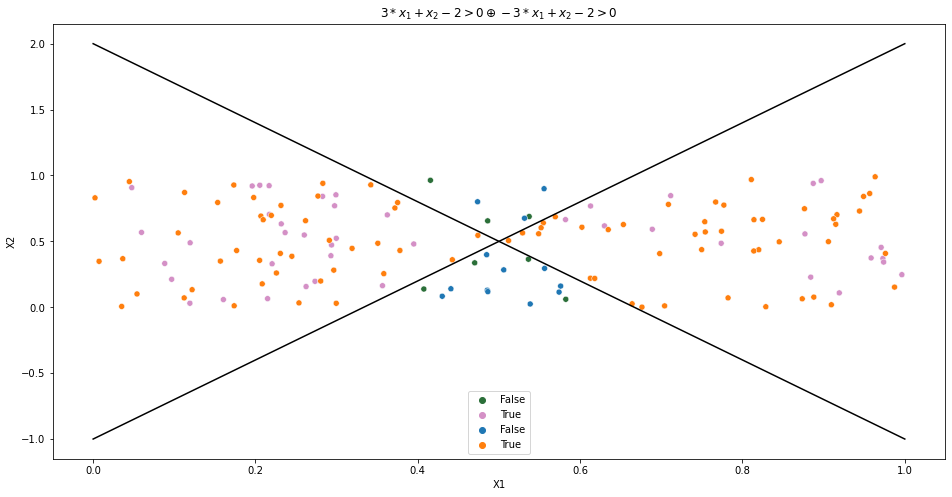

In [46]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(16)
fig.set_figheight(8)
ax.plot(
    np.linspace(0, 1, 11),
    -3 * np.linspace(0, 1, 11) + 2,
    c="black"
)
ax.plot(
    np.linspace(0, 1, 11),
    3 * np.linspace(0, 1, 11) - 1,
    c="black"
)
sns.scatterplot(
    x=Xnew[:, 0], 
    y=Xnew[:, 1], 
    hue=output, 
    ax=ax, 
    palette="cubehelix"
)
sns.scatterplot(
    x=X[:, 0], 
    y=X[:, 1], 
    hue=labels, 
    ax=ax, 
    palette="tab10"
)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title(r"$3 * x_1 + x_2 - 2 > 0  \oplus  -3 * x_1 + x_2 - 2 > 0$");

## 7. А как получить веса?

И так у нас есть граф вычислений который состоит из линейных слоев и трешхолдов, однако как же получить веса и смещения для линейных слоев?

Из прошлого курса мы знаем (я надеюсь), что существует метод градиентого спуска применяемый для логистической регрессии - которая похожа на комбинацию линейного слоя и функции активации - sigmoid

Однако threshold является препятсвием для нас, поскольку он не дифференцируемый, что же делать в этом случае?

Давайте заменим threshold на какую то другую функцию которая будет дифференцируема, тогда мы сможем получить веса линейного слоя.

<img src="img/activation.png">

## 8. Forward pass

Итак у нас есть линейный слой $\large{f(X) = XW + b}$ и функция активации $\large{a(X)}$

Тогда наш граф вычислений выглядит так:

$$\large{y_{pred} = a^3(a^2(a^1(XW^1 + b^1)W^2 + b^2)W^3 + b^3)}$$

Выход из функции активации обозначим y а вход z, вход X переобозначим через $y_0$ для единообразия

$$\large{y_{pred} = y^3 = a^3(z^3)}$$
$$\large{z^3 = y^2 W^3 + b^3}$$
$$\large{y^2 = a^2(z^2)}$$
$$\large{z^2 = y^1 W^2 + b^2}$$
$$\large{y^1 = a^1(z^1)}$$
$$\large{z^1 = y^0 W^1 + b^1 = X W^1 + b^1}$$


## 9. Loss function

Итак мы можем посчитать выход нашей нейронной сети, однако нам не хватает того как мы будем сравнивать то что мы получили на выходе из нейронной сети и действительных меток качества.

Допусти мы решаем задачу бинарной классификации, тогда вспомним опять логистическую регрессию и ее функционал качества:

$$\large{L = -\frac{1}{N}\sum_i^N (y_i^{true}log(y_{i}^{pred}) + (1 - y_i^{true})log(1 - y_{i}^{pred}))}$$

Такие функции называются функциями потерь, функция привиденная выше в DL называется Binary Cross Entropy или BCE, мы же ее обозначали еще как Logloss

Для регрессии мы можем использовать MSE (Mean Squared Error)

$$\large{L = \frac{1}{N}\sum_i^N (y_i^{true} - y_{i}^{pred})^2}$$

## 10. Backward pass

Итак у нас есть полный граф вычислений с функцией потерь, значит мы можем посчитать градиенты для нашей функции потерь относительно весов линейных слоев

$$\large{\frac{\partial L}{ \partial W^1} \space \frac{\partial L}{ \partial W^2} \space \frac{\partial L}{ \partial W^3}}$$
$$\large{\frac{\partial L}{ \partial b^1} \space \frac{\partial L}{ \partial b^2} \space \frac{\partial L}{ \partial b^3}}$$

Вспомним что мы можем разложить градиент сложной функции

$$\large{\frac{\partial L}{ \partial z^{3}} = \frac{\partial y^{3}}{ \partial z^{3}} \frac{\partial L}{ \partial y^{3}}}$$

Разложим до первых весов

$$\large{\frac{\partial L}{ \partial W^{3}} = \frac{\partial z^{3}}{ \partial W^{3}} \frac{\partial y^{3}}{ \partial z^{3}} \frac{\partial L}{ \partial y^{3}}}$$
$$\large{\frac{\partial L}{ \partial b^{3}} = \frac{\partial z^{3}}{ \partial b^{3}} \frac{\partial y^{3}}{ \partial z^{3}} \frac{\partial L}{ \partial y^{3}}}$$

Посчитаем все нужные градиенты

$$\large{\frac{\partial L}{ \partial y^{3}} = \frac{y^{3} - y^{true}}{y^{3}(1 - y^{3})}}$$
$$\large{\frac{\partial y^{3}}{ \partial z^{3}} = y^3 (1 - y^3)}$$
$$\large{\frac{\partial z^{3}}{ \partial W^{3}} = y^{2 \space T}}$$
$$\large{\frac{\partial z^{3}}{ \partial b^{3}} = 1}$$

Раскроем сложный градиент

$$\large{\frac{\partial L}{ \partial W^{3}} = y^{2 \space T} y^3 (1 - y^3) \frac{y^{3} - y^{true}}{y^{3}(1 - y^{3})} = y^{2 \space T} (y^{3} - y^{true})}$$
$$\large{\frac{\partial L}{ \partial b^{3}} = y^3 (1 - y^3) \frac{y^{3} - y^{true}}{y^{3}(1 - y^{3})} = y^{3} - y^{true}}$$

Перейдем на следующий слой и заметим что нам нужны веса

$$\large{\frac{\partial L}{ \partial y^{2}} =  \frac{\partial {z^3}}{\partial {y^2}} \frac{\partial L}{ \partial z^{3}}}$$
$$\large{\frac{\partial {z^3}}{\partial {y^2}} = W^3}$$

Раскроем градиент для следующего слоя

$$\large{\frac{\partial L}{ \partial y^{2}} = W^3 (y^{3} - y^{true})}$$

Для следующего слоя все будет по аналогии, только вместо начального градиента по функции потерь у нас градиент посчитанный от предыдущего слоя

$$\large{\frac{\partial L}{ \partial W^{2}} = y^1 y^2(1 - y^2) W^3 (y^{3} - y^{true})}$$
$$\large{\frac{\partial L}{ \partial b^{2}} = y^2(1 - y^2) W^3 (y^{3} - y^{true})}$$

И наконец для первого слоя

$$\large{\frac{\partial L}{ \partial W^{1}} = y^0 y^1(1 - y^1) W^2 y^2(1 - y^2) W^3 (y^{3} - y^{true})}$$
$$\large{\frac{\partial L}{ \partial b^{1}} = y^1(1 - y^1) y^2(1 - y^2) W^3 (y^{3} - y^{true})}$$

In [ ]:
# реализуем полную функцию активации sigmoid

class Sigmoid:
    
    def __init__(self):
        self.output = None
    
    def forward(self, z):
        sigma = 1 / (1 + np.exp(-z))
        self.output = sigma
        return sigma
    
    def backward(self, output_grad, learning_rate):
        return self.output * (1 - self.output) * output_grad

In [1]:
from torchvision.datasets import MNIST

In [2]:
MNIST(".", download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

In [3]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPClassifier((100, 200))